# Plot

**Table of contents**<a id='toc0_'></a>    
- 1. [2-Dimensional plot](#toc1_)    
  - 1.1. [Calculate an utility function on a vector](#toc1_1_)    
  - 1.2. [Plot the utility function in 2-dimensions](#toc1_2_)    
- 2. [3-Dimensional plots](#toc2_)    
  - 2.1. [Calculate an utility function on a grid](#toc2_1_)    
  - 2.2. [Plot the utility function](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Plotting figures using the library **[matplotlib](https://matplotlib.org/)**.

- **matplotlib**: [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py), [documentation](https://matplotlib.org/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

**Other plotting libraries:** [seaborn](https://seaborn.pydata.org/) and [bokeh](https://bokeh.pydata.org/en/latest/).

In [2]:
import numpy as np

## 1. <a id='toc1_'></a>[2-Dimensional plot](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Calculate an utility function on a vector](#toc0_)


Consider a Cobb-Douglas utility function

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

For now we fix $\alpha$ at 0.5, and $x_{2}$ at 1. And calculate utility across $x_{1}$.

In [3]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

In [4]:
# Fixed value of x2 
x2 = 1

# Number points 
N = 1000 #when we plot in python we need a lot of data points: here we specify how many, arbitrary number, just enough so the line is smooth.
#if we had set N to 10 then we would have gotten a lot of kinks - the line would not be smooth

# Max value of x1
x_max = 100 

# Create a vector x1 from 0 to x_max, with N values
x1_vec = np.linspace(0,x_max,N) #np.linspace returns a vector of evenly spaced number over a specified interval. 0 is start, x_max is end, and N is amount of numbers.

# Create an empty vector to store values of u 
u_vec = np.empty(N) #np.empty creates an empty vector of of the size N -> will be able to house N numbers

# Fill out out the vector
for i, x1 in enumerate(x1_vec): #we loop through x1 and we use enumerate to keep track of the index
    u_vec[i] = u_func(x1,x2) #for index i of x1 we save u_func(x1,x2) on the i'th space in u_vec)

# Alternatively we could just create the array using the power of numpy arrays
u_vec = u_func(x1_vec,x2) #python knows that x1_vec is a vector and that x2 and alpha are scalars, will broadcast the scalars on each element in x1_vec

In [5]:
#CHR:
print(x1_vec)

[  0.           0.1001001    0.2002002    0.3003003    0.4004004
   0.5005005    0.6006006    0.7007007    0.8008008    0.9009009
   1.001001     1.1011011    1.2012012    1.3013013    1.4014014
   1.5015015    1.6016016    1.7017017    1.8018018    1.9019019
   2.002002     2.1021021    2.2022022    2.3023023    2.4024024
   2.5025025    2.6026026    2.7027027    2.8028028    2.9029029
   3.003003     3.1031031    3.2032032    3.3033033    3.4034034
   3.5035035    3.6036036    3.7037037    3.8038038    3.9039039
   4.004004     4.1041041    4.2042042    4.3043043    4.4044044
   4.5045045    4.6046046    4.7047047    4.8048048    4.9049049
   5.00500501   5.10510511   5.20520521   5.30530531   5.40540541
   5.50550551   5.60560561   5.70570571   5.80580581   5.90590591
   6.00600601   6.10610611   6.20620621   6.30630631   6.40640641
   6.50650651   6.60660661   6.70670671   6.80680681   6.90690691
   7.00700701   7.10710711   7.20720721   7.30730731   7.40740741
   7.50750751   7.60

### 1.2. <a id='toc1_2_'></a>[Plot the utility function in 2-dimensions](#toc0_)

Import modules and state that the figures should be inlined:

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"}) 
#axes.grid: True -> we want there to be a grid
#grid.color: black -> changes color to black
#grid.alpha: 0.25 -> changes how transparent the grid is
#grid.linestyle: - -> changes it to a normal line
#see datacamp - part 1 for code above

plt.rcParams.update({'font.size': 14})
#changes font size on titles


**Constructing a plot-object in matplotlib**
1. `fig` is the figure object. It's the main "canvas" you are adding elements to.
2. `ax` is a reference to a specific subplot on the canvas (only one here)
3. Use the `ax` reference to put a diagram into the empty subplot

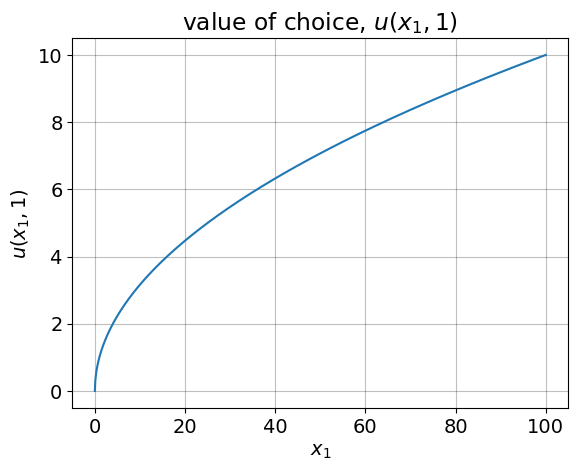

In [7]:
# a. create the figure
fig = plt.figure() #first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.
#(1,1,1) specifies that we want 1 row and 1 column, and the figure has the index 1 (is placed as the first (and in this case only) graph)


ax.plot(x1_vec,u_vec) #ax.plot does a lineplot with x1_vec as our x-variable and u_vec as our y-variable

ax.set_title('value of choice, $u(x_1,1)$') #set title
ax.set_xlabel('$x_1$') #set label for x-axis
ax.set_ylabel('$u(x_1,1)$'); #set label for y-axis
#note matplotlib understands latex math;

But what if $x_{2}$ changes?, e.g. $x_{2}=2$

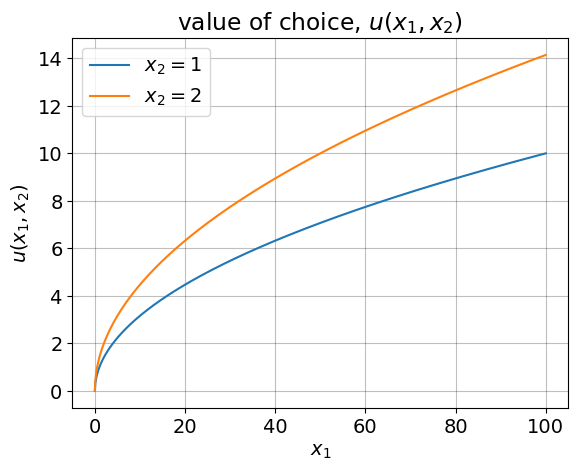

In [8]:
# Calculate secondary u_vec 
x2 = 2 #new value of x2
u_vec_2 = u_func(x1_vec,x2) #create a new utility function where x2 is 2

# a. create the figure
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1) #we create one figure

ax.plot(x1_vec,u_vec,label='$x_{2}=1$') #the old line plot
ax.plot(x1_vec,u_vec_2,label='$x_{2}=2$') #the new line plot with x2 = 2
#note the labels

ax.set_title('value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left'); # Activate legend (uses the labels in ax.plot())
 #(loc='upper left') is a location argument, that tells python where we want the legend.


We now create a loop for 10 different values of x2

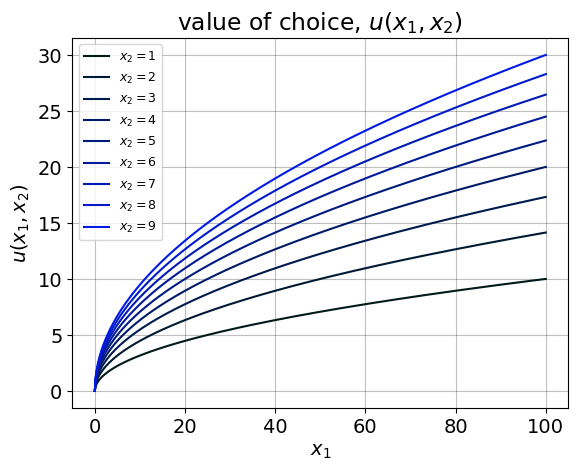

In [16]:
# a. create the figure
fig = plt.figure()

# b. 
ax = fig.add_subplot(1,1,1)

n = 10
for x2 in range(1,n):
    u_vec_x2 = u_func(x1_vec,x2)
    ax.plot(x1_vec,u_vec_x2,label='$x_{2}=$'+str(x2),c=(0.,0.1,x2/n)) # c is the color, the argument is the color in rgb format (in percentages of 255)
    #remember with the label that we have to specify str(x2) to make it all go in one string

ax.set_title('value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left',prop={'size':9}); # Activate legend (uses the labels in ax.plot())


## 2. <a id='toc2_'></a>[3-Dimensional plots](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Calculate an utility function on a grid](#toc0_)

In order to describe the shape of our utility function across both $x_{1}$ and $x_{2}$, we need to numerically evaluate it on a set of points. 

Thus, we calculate the utility function on a **2-dimensional grid** (`x1` and `x2`) with $N$ elements in each dimension:

In [17]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate 2d numpy arrays for x1 and x2
shape_tuple = (N,N) #we create a tuple with our new size in a 2d numpy array
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays using a nested loop
for i in range(N): # 0,1,...,N-1 #loop through rows
    for j in range(N): # 0,1,...,N-1 # loop through coloumns
        x1_values[i,j] = (i/(N-1))*x_max # in [0,x_max] #we're just counting upwards, can be interpreted as a percentage of the maxpoint
        x2_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25) #utility function

#The end result of this nested loop is that u_values will be filled with the results of applying u_func 
#to a grid of NxN evenly-spaced x1 and x2 values in the range [0, x_max].

In [18]:
print(x1_values)

[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.1010101  0.1010101  0.1010101 ...  0.1010101  0.1010101  0.1010101]
 [ 0.2020202  0.2020202  0.2020202 ...  0.2020202  0.2020202  0.2020202]
 ...
 [ 9.7979798  9.7979798  9.7979798 ...  9.7979798  9.7979798  9.7979798]
 [ 9.8989899  9.8989899  9.8989899 ...  9.8989899  9.8989899  9.8989899]
 [10.        10.        10.        ... 10.        10.        10.       ]]


**Note:** x1_values and x2_values are **both 2d**.  
This is not strictly necessary in the present case. 1d arrays would suffice below in the nested loop and filling out of u_values.  
However, it makes them isomorphic with the mesh grids used for countour plots, which often need 2d mesh grids. 

Isomorphic = corresponding or similar in form and relations

**Alternatively:** Use the corresponding numpy function to create your grid:

In [19]:
# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij') 
#np.meshgrid creates a grid of all the different possible combinations of values x1 and x2
#indexing specifies how you want the indexing to work: rows and columns

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 

u_values_mesh = u_func(x1_mesh, x2_mesh, alpha=0.25) #will create a utility function using broadcasting -> puts matrixes into u_func and has alpha as scalar

Dimension of grid over x1 (same as x2):  (100, 100)


* How could `u_func` evaluate utility on x1_mesh and x2_mesh?  
* Because numpy does everything *element-by-element*.  
* Do you see why we **needed** a mesh grid instead of `x1_values = x_vec`?

That is because of the "combinations" element of meshgrid

**Mesh grids** are a little tricky to understand, but important for creating surface plots. You can read more at:  
[GeeksforGeeks](https://www.geeksforgeeks.org/numpy-meshgrid-function/), [stack overflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) and the [numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Test whether the results are the same:

In [20]:
# a. maximum absolute difference
max_abs_diff = np.max(np.abs(u_values-u_values_mesh))
print(max_abs_diff) # very close to zero     

# b. test if all values are "close"
print(np.allclose(u_values,u_values_mesh))

2.6645352591003757e-15
True


**Note:** The results are not exactly the same due to floating point arithmetics.

### 2.2. <a id='toc2_2_'></a>[Plot the utility function](#toc0_)

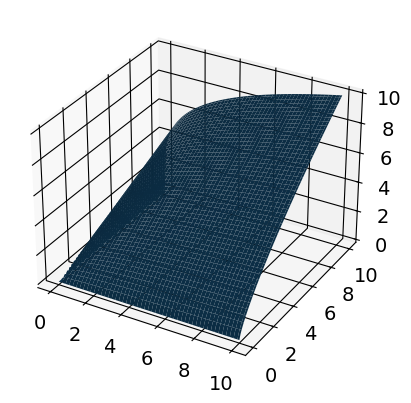

In [21]:
%matplotlib inline
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
#projection = '3d' tells python that we want a 3-dimensional plot
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis
#surface plot because it is 3-dimensional, x-value, y-value z-value
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

You can make the figure **zoomable** and **panable** using a **widget**:

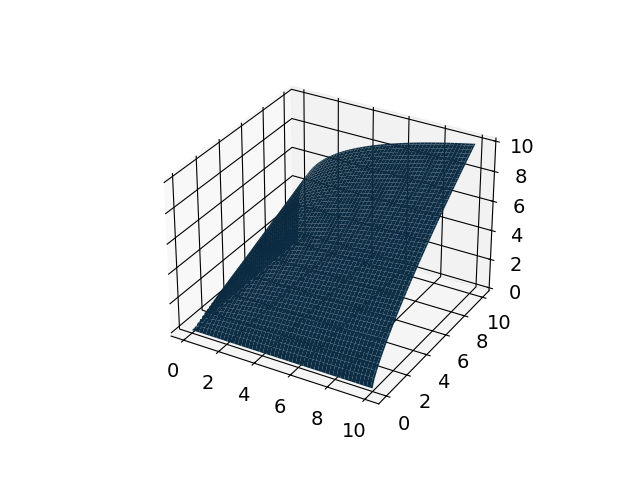

In [22]:
%matplotlib widget 
#alows us to move around the figure and move it
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure #
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

Note: If this is not working for you, make sure you did step 1b in the [installation guide](https://sites.google.com/view/numeconcph-introprog/guides/installation), try to update nodejs, ipympl, ipywidgets. Sometimes it's really difficult to get widgets to work so don't hesitate to ask your TA for help. <br>
See [here](https://matplotlib.org/3.2.2/users/navigation_toolbar.html) for navigating (use left-click and mouse to look around, and right-click and mouse to zoom).

To restore normal plotting, turn on `inline`:

In [23]:
%matplotlib inline

**Making it pretty**: Use a colormap and set labels.  

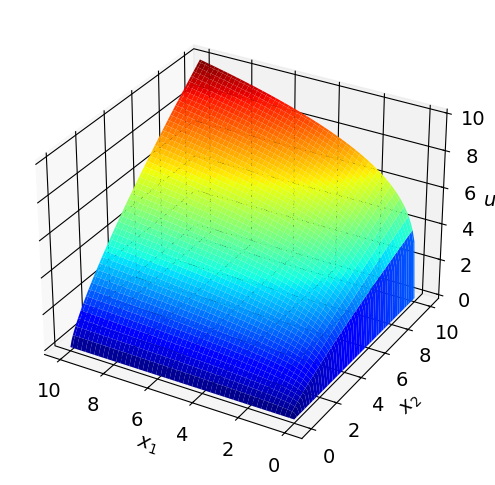

In [24]:
from matplotlib import cm # for colormaps
# a. actual plot
fig = plt.figure(figsize=(5,5)) #we can change the figure size when we initialize the plot
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)
#cmap = cm.jet will automatically make a colormap that goes from dark blue for the low values to dark red for the high values

# b. add labels
ax.set_xlabel('$x_1$') # Notice latex syntax
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.zaxis.labelpad=0.05 #had to add this to keep z-label in, else it was slightly cropped out

# c. invert xaxis to bring Origin in center front
ax.invert_xaxis() #inverts x
fig.tight_layout() #moves stuff around, generally just makes it look better

Saving your figure is easy:

In [25]:
fig.savefig('someplot.pdf') # or e.g. .png 

**More formatting options?** See these [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py). <br>
Another approach would be to use the [Seaborn package](https://seaborn.pydata.org/tutorial/objects_interface.html) which can create good looking plots. The syntax is however different from matplotlib. As I understand it, the syntax is reminiscent of ggplot2 for R. so if you're used to that seaborn might be for you.

**Task**: Construct the following plot:

![wireframeplot](someplot_wireframe.png)

It's called a wireframe and examples can be found [here](https://www.tutorialspoint.com/matplotlib/matplotlib_3d_wireframe_plot.htm) and [here](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html): 

**Answer:**

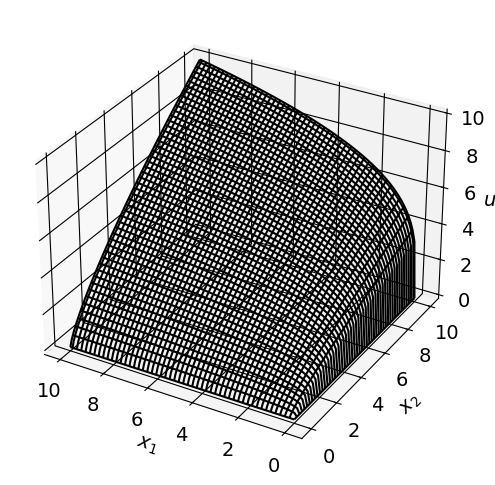

In [26]:
# write your code here
fig = plt.figure(figsize=(5,5)) #we can change the figure size when we initialize the plot
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values, edgecolor = 'black')
#cmap = cm.jet will automatically make a colormap that goes from dark blue for the low values to dark red for the high values

# b. add labels
ax.set_xlabel('$x_1$') # Notice latex syntax
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.zaxis.labelpad=0.05 #had to add this to keep z-label in, else it was slightly cropped out

# c. invert xaxis to bring Origin in center front
ax.invert_xaxis() #inverts x
fig.tight_layout() #moves stuff around, generally just makes it look better

In [ ]:
# a. actual plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values,edgecolor='black')

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('someplot_wireframe.png')
fig.savefig('someplot_wireframe.pdf')